<a href="https://colab.research.google.com/github/KaviyaVarshini2005/naan-mudhalvan-project/blob/main/Customer%20Support%20ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


Shape of the DataFrame: (3725, 3)

Data Types:
 Unnamed: 0     int64
question      object
answer        object
dtype: object

Missing Values:
 Unnamed: 0    0
question      0
answer        0
dtype: int64

Descriptive Statistics:

Column: Unnamed: 0
count    3725.000000
mean     1862.000000
std      1075.459204
min         0.000000
25%       931.000000
50%      1862.000000
75%      2793.000000
max      3724.000000
Name: Unnamed: 0, dtype: float64

Column: question
Unique values: 3510
Most frequent values:
 question
what do you mean?    22
why not?             16
what happened?       10
why is that?          9
like what?            7
Name: count, dtype: int64

Column: answer
Unique values: 3512
Most frequent values:
 answer
what do you mean?    22
why not?             16
what happened?       10
why is that?          9
me too.               8
Name: count, dtype: int64
Top 10 frequent words in questions: [('i', 969), ('you', 774), ('the', 763), ('to', 665), ('a', 629), ('it', 349), ('what'

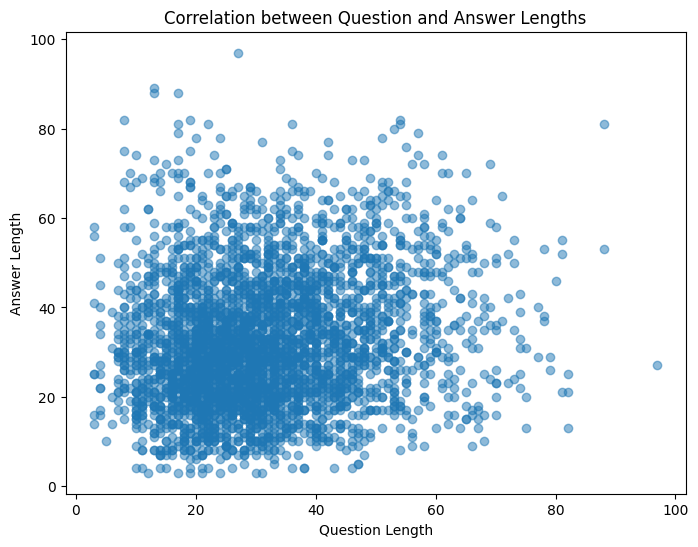

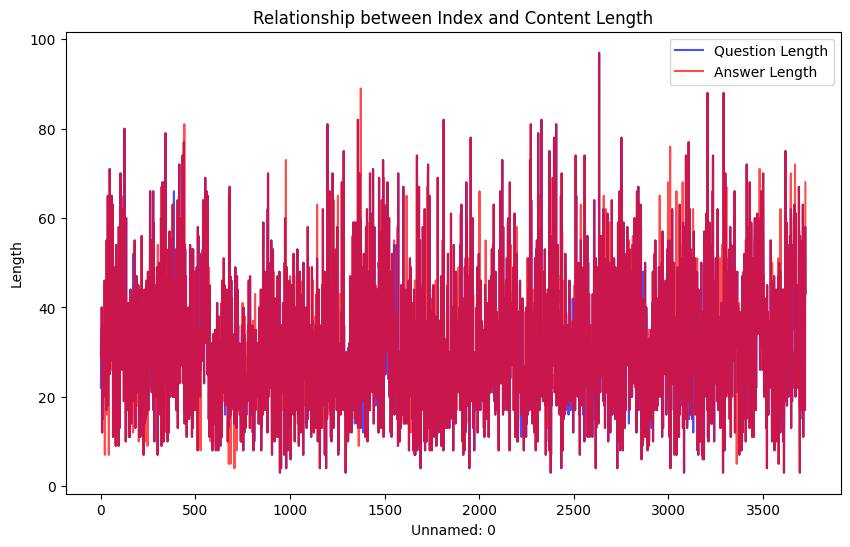

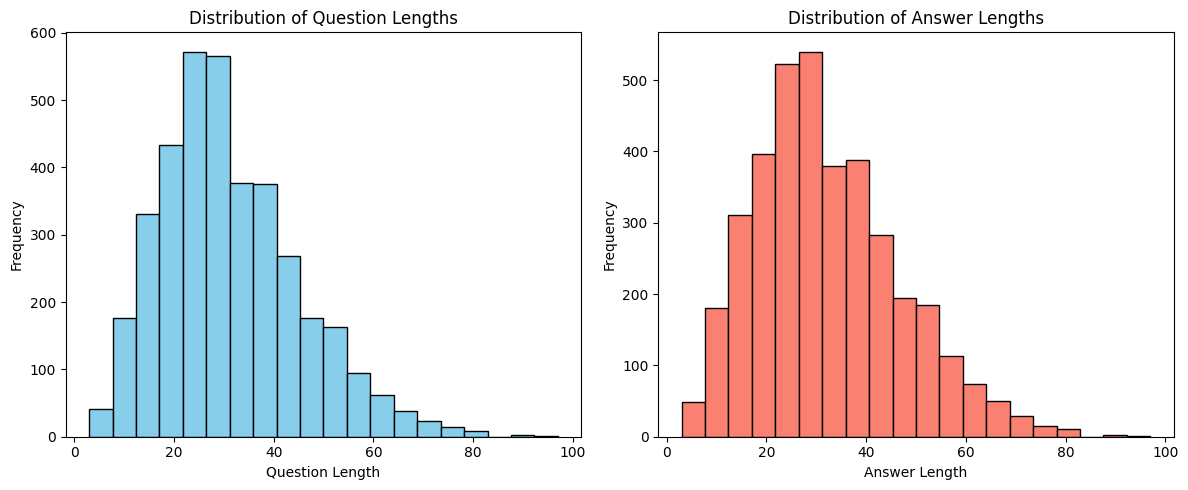

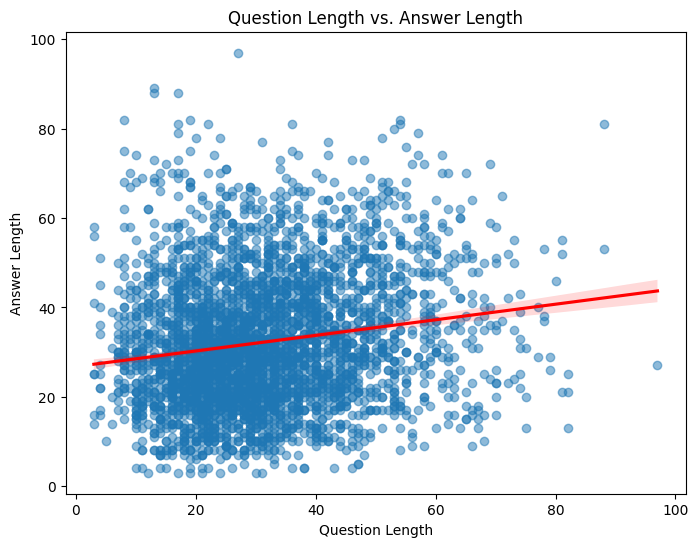

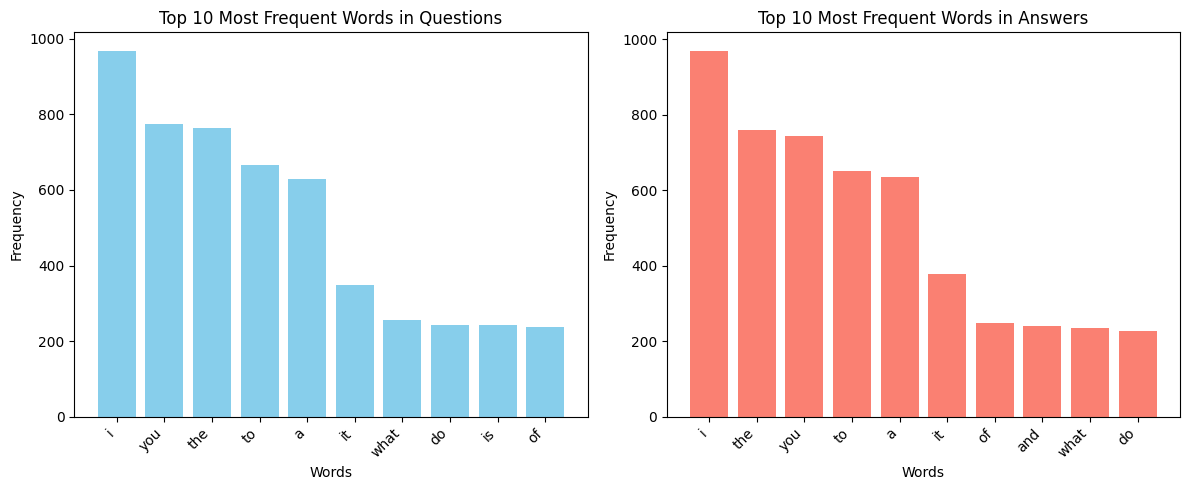

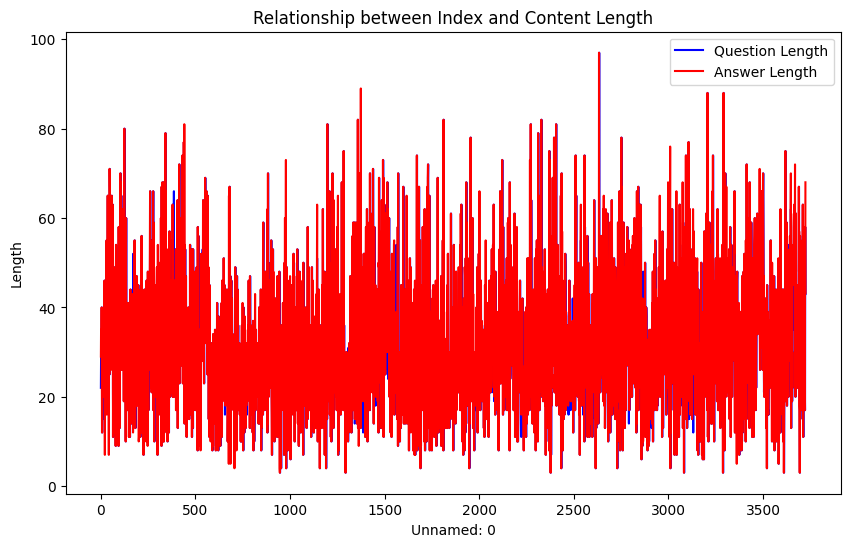

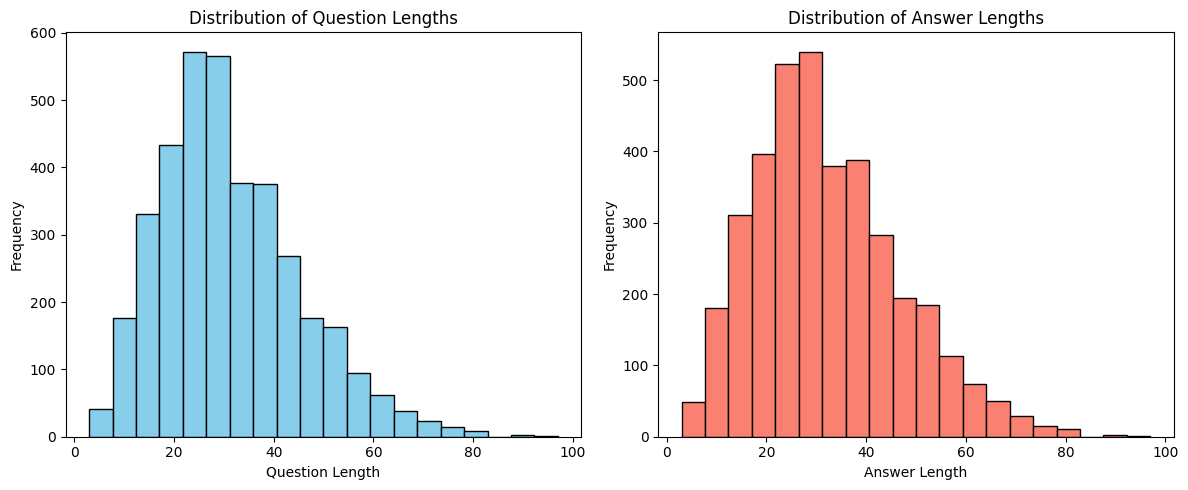

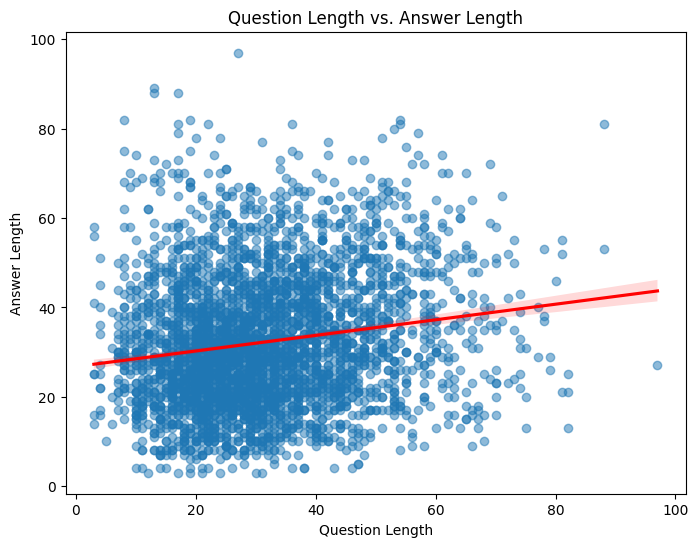

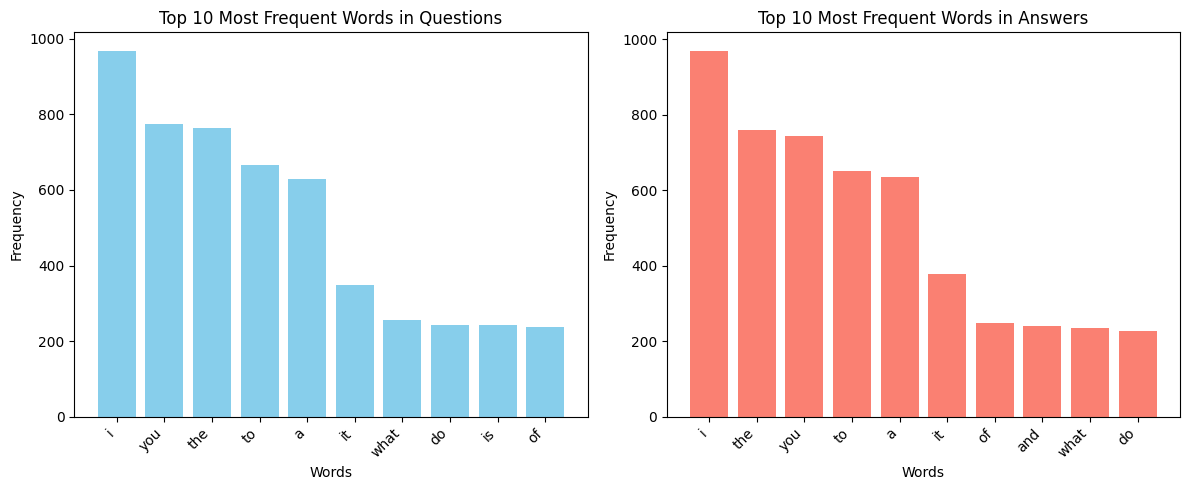

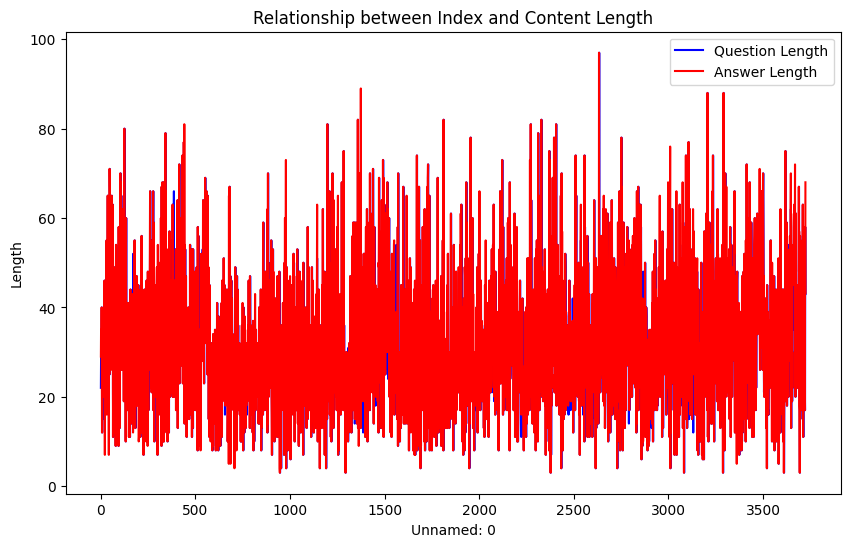

In [1]:
import pandas as pd
try:
    df = pd.read_csv('Conversation.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Conversation.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'Conversation.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'Conversation.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None


# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Analyze numerical and categorical columns
print("\nDescriptive Statistics:")
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\nColumn: {col}")
        print(df[col].describe())
        # Add histogram or box plot here (requires matplotlib)
    elif pd.api.types.is_string_dtype(df[col]):
        print(f"\nColumn: {col}")
        print("Unique values:", df[col].nunique())
        print("Most frequent values:\n",df[col].value_counts().head())
    else:
        print(f"\nColumn: {col} - other type")
        print("Unique values:", df[col].nunique())



import matplotlib.pyplot as plt
from collections import Counter

# Word frequency analysis
question_words = ' '.join(df['question']).lower().split()
answer_words = ' '.join(df['answer']).lower().split()

question_word_counts = Counter(question_words)
answer_word_counts = Counter(answer_words)

# Display the top 10 most frequent words in questions and answers
print("Top 10 frequent words in questions:", question_word_counts.most_common(10))
print("Top 10 frequent words in answers:", answer_word_counts.most_common(10))

# Question/answer length correlation
df['question_length'] = df['question'].str.len()
df['answer_length'] = df['answer'].str.len()

plt.figure(figsize=(8, 6))
plt.scatter(df['question_length'], df['answer_length'], alpha=0.5)
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Correlation between Question and Answer Lengths')
plt.show()

# Relationship between "Unnamed: 0" and content
plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['question_length'], label='Question Length', color='blue', alpha=0.7)
plt.plot(df['Unnamed: 0'], df['answer_length'], label='Answer Length', color='red', alpha=0.7)
plt.xlabel('Unnamed: 0')
plt.ylabel('Length')
plt.title('Relationship between Index and Content Length')
plt.legend()
plt.show()

# Sentiment analysis (if possible) - Placeholder, needs sentiment analysis library
# Install necessary library
# !pip install textblob
# from textblob import TextBlob
# df['question_sentiment'] = df['question'].apply(lambda x: TextBlob(x).sentiment.polarity)
# df['answer_sentiment'] = df['answer'].apply(lambda x: TextBlob(x).sentiment.polarity)

# plt.figure(figsize=(10,6))
# plt.hist(df['question_sentiment'], alpha=0.5, label='Question Sentiment', color='blue')
# plt.hist(df['answer_sentiment'], alpha=0.5, label='Answer Sentiment', color='red')
# plt.xlabel('Sentiment Polarity')
# plt.ylabel('Frequency')
# plt.title('Sentiment Distribution')
# plt.legend()
# plt.show()

# Correlation between question and answer sentiment (requires sentiment scores)
# print(df[['question_sentiment', 'answer_sentiment']].corr())


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Histograms for question_length and answer_length
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['question_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')

plt.subplot(1, 2, 2)
plt.hist(df['answer_length'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Lengths')
plt.tight_layout()
plt.show()

# 2. Scatter plot of question_length vs. answer_length
plt.figure(figsize=(8, 6))
sns.regplot(x='question_length', y='answer_length', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Question Length vs. Answer Length')
plt.show()

# 3. Bar charts for top 10 frequent words
question_words = ' '.join(df['question']).lower().split()
answer_words = ' '.join(df['answer']).lower().split()

question_word_counts = Counter(question_words)
answer_word_counts = Counter(answer_words)

# Extract words and counts for the bar charts
top_10_question_items = question_word_counts.most_common(10)
top_10_question_words = [item[0] for item in top_10_question_items]
top_10_question_counts = [item[1] for item in top_10_question_items]

top_10_answer_items = answer_word_counts.most_common(10)
top_10_answer_words = [item[0] for item in top_10_answer_items]
top_10_answer_counts = [item[1] for item in top_10_answer_items]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Pass the list of words as x-values and counts as heights
plt.bar(top_10_question_words, top_10_question_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Questions')

plt.subplot(1, 2, 2)
# Pass the list of words as x-values and counts as heights
plt.bar(top_10_answer_words, top_10_answer_counts, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Answers')

plt.tight_layout()
plt.show()

# 4. Plot of 'Unnamed: 0' vs. question_length and answer_length
plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['question_length'], label='Question Length', color='blue')
plt.plot(df['Unnamed: 0'], df['answer_length'], label='Answer Length', color='red')
plt.xlabel('Unnamed: 0')
plt.ylabel('Length')
plt.title('Relationship between Index and Content Length')
plt.legend()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Histograms for question_length and answer_length
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['question_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')

plt.subplot(1, 2, 2)
plt.hist(df['answer_length'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Lengths')
plt.tight_layout()
plt.show()

# 2. Scatter plot of question_length vs. answer_length
plt.figure(figsize=(8, 6))
sns.regplot(x='question_length', y='answer_length', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Question Length vs. Answer Length')
plt.show()

# 3. Bar charts for top 10 frequent words
question_words = ' '.join(df['question']).lower().split()
answer_words = ' '.join(df['answer']).lower().split()

question_word_counts = Counter(question_words)
answer_word_counts = Counter(answer_words)

top_10_question_words = [word for word, count in question_word_counts.most_common(10)]
top_10_question_counts = [count for word, count in question_word_counts.most_common(10)]

top_10_answer_words = [word for word, count in answer_word_counts.most_common(10)]
top_10_answer_counts = [count for word, count in answer_word_counts.most_common(10)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(top_10_question_words, top_10_question_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Questions')

plt.subplot(1, 2, 2)
plt.bar(top_10_answer_words, top_10_answer_counts, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Answers')

plt.tight_layout()
plt.show()

# 4. Plot of 'Unnamed: 0' vs. question_length and answer_length
plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['question_length'], label='Question Length', color='blue')
plt.plot(df['Unnamed: 0'], df['answer_length'], label='Answer Length', color='red')
plt.xlabel('Unnamed: 0')
plt.ylabel('Length')
plt.title('Relationship between Index and Content Length')
plt.legend()
plt.show()
